In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import os

In [6]:
os.chdir("/Users/juanvasquez/Downloads")

In [7]:
df = pd.read_csv("time_series_leads_daily - copia.csv")

In [8]:
df.head ()

,fecha_alta,leads
0,2019-11-01,35
1,2019-11-02,32
2,2019-11-03,33
3,2019-11-04,23
4,2019-11-05,60


In [13]:
df=df.drop(columns=['id_unidad_medida', 'id_store', 'id_newproduct', 'name_product_end', 'unidad_medida', 'name_store'])
df.head()

,cantidad_product,date_updateorder
0,38040.0,2019-02-01
1,39640.0,2019-03-01
2,45960.0,2019-04-01
3,17600.0,2019-06-01
4,44000.0,2019-08-01


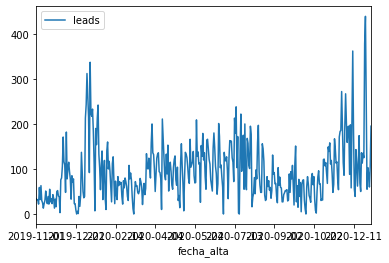

In [9]:
df.set_index('fecha_alta',inplace=True)
df.plot()
plt.show()

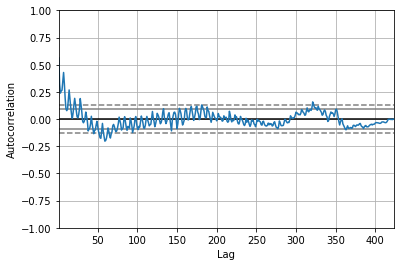

In [10]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

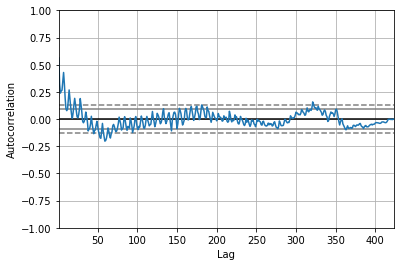

In [11]:
pd.plotting.autocorrelation_plot(df)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.leads   No. Observations:                  422
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2266.173
Method:                       css-mle   S.D. of innovations             51.943
Date:                Thu, 07 Jan 2021   AIC                           4546.346
Time:                        08:24:03   BIC                           4574.661
Sample:                             1   HQIC                          4557.535
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2129      0.910      0.234      0.815      -1.571       1.997
ar.L1.D.leads    -0.4205      0.047     -8.927      0.000      -0.513      -0.328
ar.L2.D.leads    -0.4442      0.050     

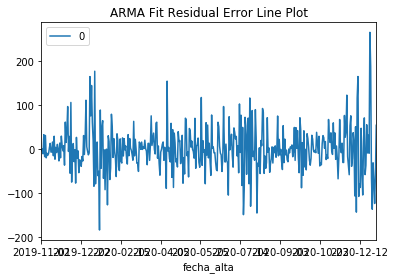

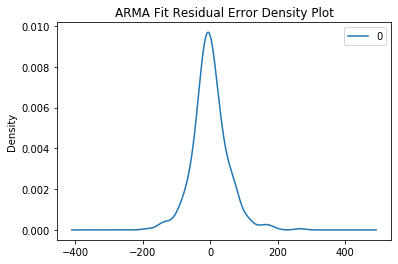

                0
count  422.000000
mean    -0.000408
std     52.008181
min   -184.484692
25%    -27.171703
50%     -1.948876
75%     25.229700
max    265.988151


In [18]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=1)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

predicted=67.882509, expected=160.000000
predicted=106.944764, expected=198.000000
predicted=147.193667, expected=95.000000
predicted=90.639588, expected=65.000000
predicted=91.292026, expected=49.000000
predicted=78.465580, expected=49.000000
predicted=89.844081, expected=157.000000
predicted=148.096495, expected=146.000000
predicted=118.847345, expected=118.000000
predicted=97.761850, expected=43.000000
predicted=63.659179, expected=31.000000
predicted=55.032480, expected=34.000000
predicted=81.795997, expected=84.000000
predicted=95.357302, expected=62.000000
predicted=75.583171, expected=75.000000
predicted=59.789342, expected=54.000000
predicted=51.392348, expected=60.000000
predicted=53.866083, expected=36.000000
predicted=56.601909, expected=53.000000
predicted=55.580531, expected=132.000000
predicted=99.081311, expected=90.000000
predicted=76.239299, expected=93.000000
predicted=78.493289, expected=68.000000
predicted=66.876739, expected=69.000000
predicted=69.847557, expected=

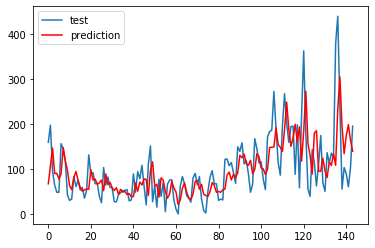

In [13]:
from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()